<a href="https://colab.research.google.com/github/Lynnluxu/tpRNN/blob/master/TP_RNN_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.datasets as dsets

In [0]:
# Hyperparameters
EPOCH = 1 # Define the training times
BATCH_SIZE = 64
TIME_STEP = 28
INPUT_SIZE = 28
LR = 0.01
DOWNLOAD_MNIST = True

In [3]:
# MNIST digital data set
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,
    transform=transforms.ToTensor(),
    download=DOWNLOAD_MNIST,
)



Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


<built-in method size of Tensor object at 0x7f3aa346fcf0>
<built-in method size of Tensor object at 0x7f3aa346f168>


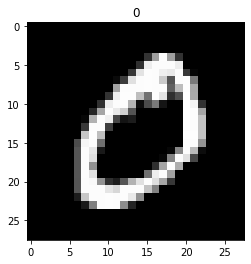

In [4]:
# Print one of the examples
print(train_data.train_data.size)  # print the torch.Size of data(as below)
print(train_data.train_labels.size)  # print the torch.Size of labels(as below)
plt.imshow(train_data.train_data[1], cmap='gray')
plt.title('%i' % train_data.train_labels[1])
plt.show()

In [0]:
# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_data, # MNIST digital data set
    batch_size=BATCH_SIZE,
    shuffle=True,    
)

In [7]:
# Convert test_data to Variable, and take out the first 2000 as test
test_data = dsets.MNIST(
    root='./mnist/', 
    train=False,
    transform=transforms.ToTensor(),
)
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels.numpy().squeeze()[:2000]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.LSTM(  # If use nn.RNN(), it is almost impossible to learn
            input_size=INPUT_SIZE,
            hidden_size=64,  # hidden unit
            num_layers=1,  # rnn layers number
            batch_first=True,  # The batch size of input & output is 1 dimension. For example (batch, time_step, input_size)
        )
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, )  # zero initial hidden state
        
        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [10]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [12]:
# Train and test neural networks
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y
 
        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                # backpropagation, compute gradients
        optimizer.step()                                # apply gradients
 
        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', EPOCH, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)

Epoch:  1 | train loss: 2.3022 | test accuracy: 0.09
Epoch:  1 | train loss: 1.1177 | test accuracy: 0.69
Epoch:  1 | train loss: 0.5696 | test accuracy: 0.74
Epoch:  1 | train loss: 0.6793 | test accuracy: 0.81
Epoch:  1 | train loss: 0.2644 | test accuracy: 0.88
Epoch:  1 | train loss: 0.2942 | test accuracy: 0.89
Epoch:  1 | train loss: 0.3524 | test accuracy: 0.92
Epoch:  1 | train loss: 0.3275 | test accuracy: 0.91
Epoch:  1 | train loss: 0.0997 | test accuracy: 0.93
Epoch:  1 | train loss: 0.3373 | test accuracy: 0.94
Epoch:  1 | train loss: 0.3350 | test accuracy: 0.94
Epoch:  1 | train loss: 0.1198 | test accuracy: 0.94
Epoch:  1 | train loss: 0.2149 | test accuracy: 0.95
Epoch:  1 | train loss: 0.1959 | test accuracy: 0.94
Epoch:  1 | train loss: 0.0542 | test accuracy: 0.96
Epoch:  1 | train loss: 0.2684 | test accuracy: 0.94
Epoch:  1 | train loss: 0.1912 | test accuracy: 0.96
Epoch:  1 | train loss: 0.2912 | test accuracy: 0.95
Epoch:  1 | train loss: 0.1849 | test accuracy

In [13]:
# Print the first 10 test values
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
